In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from collections import Counter


In [4]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignments\Assignment2\Datasets\DS' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    return df

In [5]:
def vote(neighbors):
    classCounter = Counter()
    for neighbor in neighbors:
        classCounter[neighbor[1]]+=1
        
    return classCounter.most_common(1)[0][0]

In [6]:
def kMM(testRow, dfTrain):
    vectorTrainClass = dfTrain.iloc[:,20].as_matrix()
    matrixTrain = dfTrain.iloc[:,0:20].as_matrix()
    vectorTest = testRow[0:20].as_matrix()
#     print(vectorTest)
    subtractedMatrix = np.subtract(matrixTrain, vectorTest)
    squareMatrix = np.square(subtractedMatrix)
    distances = np.sqrt(np.sum(squareMatrix, axis = 1))
    zipped = list(zip(distances, vectorTrainClass))
    
    return sorted(zipped)

In [56]:
def getNNClass(testRow, k, dfTrain):
    listSorted = kMM(testRow, dfTrain)
    classCounter = vote(listSorted[0:k])
    
    return classCounter

In [57]:
import pprint
def iterateTestData1(dfTrain, dfTest):
    emptyArray = np.zeros((1200, 2800,2))
    
    for i in range(0, len(dfTest)):
        emptyArray[i] = np.asarray(kMM(dfTest.iloc[i, :], dfTrain))
    
    return emptyArray



In [73]:
def predictionsArray(distancesMatrix, k):
    predictions = list()
    for i in range(0, len(distancesMatrix)):
        predictions.append(vote(distancesMatrix[i,0:k]))
    
    return predictions

In [75]:
def testScores1(predictionArray, dfTest):
    
    truePositive,trueNegative, falsePositive, falseNegative = np.zeros(4)
    for i in range(0, len(dfTest)):
        if predictionArray[i]==1:
            if dfTest[i]==1:
                truePositive+=1
            elif dfTest[i]==0:
                falsePositive+=1
        elif predictionArray[i]==0:
            if dfTest[i]==1:
                falseNegative+=1
            elif dfTest[i]==0:
                trueNegative+=1

    precision = truePositive/(truePositive+falsePositive)
    recall = truePositive/(truePositive+falseNegative)
    fMeasure = 2*precision*recall/(precision+recall)

    return (precision, recall, fMeasure)

# testScores(2, 20)

len(distancesMatrix) 1200
len(distancesMatrix[0]) 2800
[  1.00000000e+00   3.00000000e+00   5.00000000e+00   7.00000000e+00
   9.00000000e+00   1.10000000e+01   1.30000000e+01   1.50000000e+01
   1.70000000e+01   1.90000000e+01   2.10000000e+01   2.30000000e+01
   2.50000000e+01   2.70000000e+01   2.90000000e+01   3.10000000e+01
   3.30000000e+01   3.50000000e+01   3.70000000e+01   3.90000000e+01
   4.10000000e+01   4.30000000e+01   4.50000000e+01   4.70000000e+01
   4.90000000e+01   5.10000000e+01   5.30000000e+01   5.50000000e+01
   5.70000000e+01   5.90000000e+01   6.10000000e+01   6.30000000e+01
   6.50000000e+01   6.70000000e+01   6.90000000e+01   7.10000000e+01
   7.30000000e+01   7.50000000e+01   7.70000000e+01   7.90000000e+01
   8.10000000e+01   8.30000000e+01   8.50000000e+01   8.70000000e+01
   8.90000000e+01   9.10000000e+01   9.30000000e+01   9.50000000e+01
   9.70000000e+01   9.90000000e+01   1.01000000e+02   1.03000000e+02
   1.05000000e+02   1.07000000e+02   1.09000000e

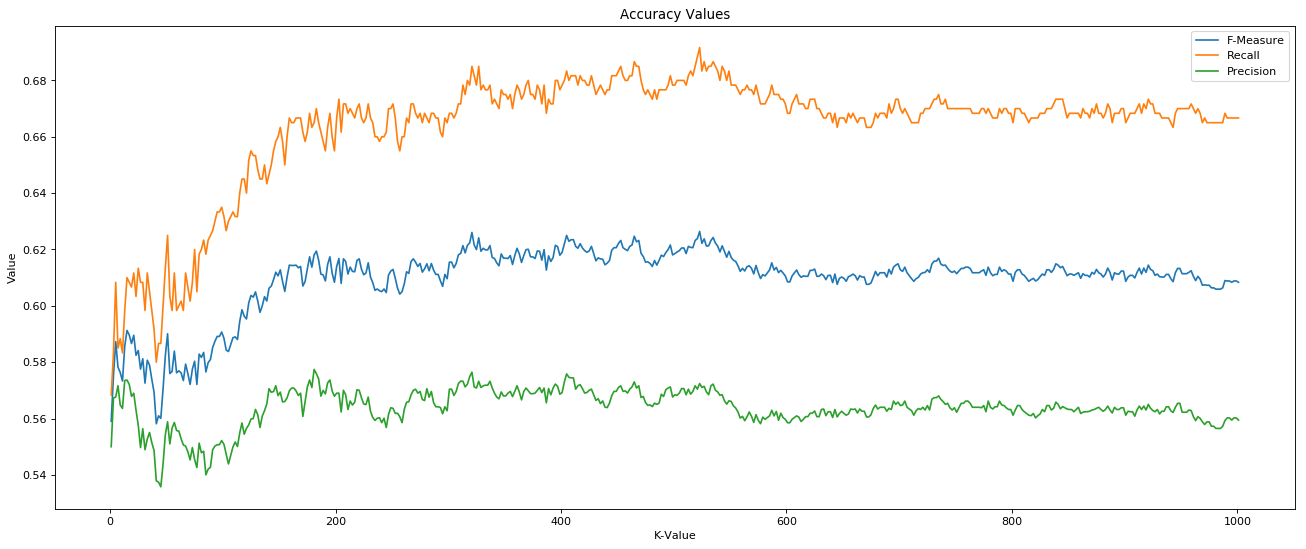

Highest Precision 0.577424023155 at K-value 181.0
Highest Recall 0.691666666667 at K-value 523.0
Highest F-Measure 0.62641509434 at K-value 523.0


In [80]:
def graphFit1(dataset):
    if dataset == 1:
        dfTest = readCsv('1_test.csv')
        dfTrain = readCsv('1_train.csv')
    else:
        dfTest = readCsv('2_test.csv')
        dfTrain = readCsv('2_train.csv')
        
    k = np.linspace(1,1001, 501)
    
    distancesMatrix = (iterateTestData1(dfTrain, dfTest))
    print('len(distancesMatrix)',len(distancesMatrix))
    print('len(distancesMatrix[0])',len(distancesMatrix[0]))
    realClass = dfTest[20].as_matrix()
    
    fMeasure = list()
    precision = list()
    recall = list()
    print(k)
    
    lowestPrecision, lowestRecall, lowestFMeasure = np.zeros(3)
    lowPrecIndex, lowRecIndex, lowFIndex = np.zeros(3)
    for item in k:
        testScore = testScores1(predictionsArray(distancesMatrix, int(item)), realClass)
                                
        precision.append(testScore[0])
        recall.append(testScore[1])
        fMeasure.append(testScore[2])
        if (testScore[0]>lowestPrecision):
            lowestPrecision = testScore[0]
            lowPrecIndex = item
        if (testScore[1]>lowestRecall):
            lowestRecall = testScore[1]
            lowRecIndex = item
        if (testScore[2]>lowestFMeasure):
            lowestFMeasure = testScore[2]
            lowFIndex = item
        
        
        
    plt.figure(figsize=(20,8), dpi=80)
    plt.plot(k, fMeasure, '-', label = 'F-Measure' )
    plt.plot(k, recall, '-', label = 'Recall' )
    plt.plot(k, precision, '-', label = 'Precision' )
    plt.xlabel('K-Value')
    plt.ylabel('Value')
    plt.legend(loc=1)
    plt.title('Accuracy Values')
    plt.show()
    print('Highest Precision', lowestPrecision, 'at K-value', lowPrecIndex)
    print('Highest Recall', lowestRecall, 'at K-value', lowRecIndex)
    print('Highest F-Measure', lowestFMeasure, 'at K-value', lowFIndex)
    
graphFit1(1)

In [59]:
def iterateTestData(dfTest, dfTrain, k):
    predictions = list()
    
    for i in range(0, len(dfTest)):
        predictions.append(getNNClass(dfTest.iloc[i,:], k, dfTrain))

    return predictions

In [60]:
def testScores(dataset, k):
    if dataset == 1:
        dfTest = readCsv('1_test.csv')
        dfTrain = readCsv('1_train.csv')
    else:
        dfTest = readCsv('2_test.csv')
        dfTrain = readCsv('2_train.csv')
    
    predictionArray = iterateTestData(dfTest, dfTrain, k)
    
    dfTest = dfTest[20].as_matrix()
#     print(dfTest)
    truePositive,trueNegative, falsePositive, falseNegative = np.zeros(4)
    for i in range(0, len(dfTest)):
        if predictionArray[i]==1:
            if dfTest[i]==1:
                truePositive+=1
            elif dfTest[i]==0:
                falsePositive+=1
        elif predictionArray[i]==0:
            if dfTest[i]==1:
                falseNegative+=1
            elif dfTest[i]==0:
                trueNegative+=1

    precision = truePositive/(truePositive+falsePositive)
    recall = truePositive/(truePositive+falseNegative)
    fMeasure = 2*precision*recall/(precision+recall)

    return (precision, recall, fMeasure)

testScores(2, 20)

(0.54125412541254125, 0.52988691437802904, 0.53551020408163263)

In [61]:
def graphFit(dataset):
    k = np.linspace(1,11, 6)
    fMeasure = list()
    precision = list()
    recall = list()
    print(k)
    lowestPrecision, lowestRecall, lowestFMeasure = np.zeros(3)
    lowPrecIndex, lowRecIndex, lowFIndex = np.zeros(3)
    for item in k:
        testScore = testScores(dataset, int(item))
        precision.append(testScore[0])
        recall.append(testScore[1])
        fMeasure.append(testScore[2])
        if (testScore[0]>lowestPrecision):
            lowestPrecision = testScore[0]
            lowPrecIndex = item
        if (testScore[1]>lowestRecall):
            lowestRecall = testScore[1]
            lowRecIndex = item
        if (testScore[2]>lowestFMeasure):
            lowestFMeasure = testScore[2]
            lowFIndex = item
        
        
        
    plt.figure(figsize=(20,8), dpi=80)
    plt.plot(k, fMeasure, '-', label = 'F-Measure' )
    plt.plot(k, recall, '-', label = 'Recall' )
    plt.plot(k, precision, '-', label = 'Precision' )
    plt.xlabel('K-Value')
    plt.ylabel('Value')
    plt.legend(loc=1)
    plt.title('Accuracy Values')
    plt.show()
    print('Highest Precision', lowestPrecision, 'at K-value', lowPrecIndex)
    print('Highest Recall', lowestRecall, 'at K-value', lowRecIndex)
    print('Highest Precision', lowestFMeasure, 'at K-value', lowFIndex)
    

[  1.   3.   5.   7.   9.  11.]


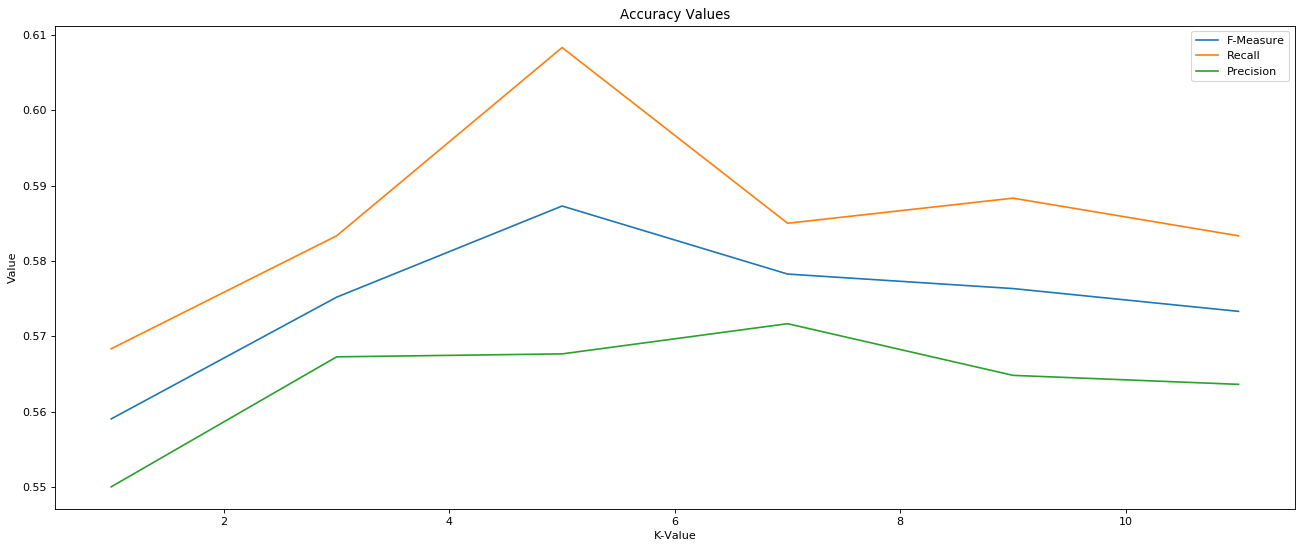

Lowest Precision 0.571661237785 at K-value 7.0
Lowest Recall 0.608333333333 at K-value 5.0
Lowest Precision 0.587288817377 at K-value 5.0


In [77]:
graphFit(1)